In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
path = '/Users/davidmiles-skov/Desktop/Academics/Projects/market-clearing-price/data/test.csv'
df = pd.read_csv(path)
# renaming columns for easier access
mapper={'Quantity (MWh)':'Quantity',  'Price (€/MWh)':'Price'}
df=df.rename(columns=mapper)
df_supply = df[df['Supply/Demand']=='Supply'].sort_values(by=['Price']).sort_values(by=['Price'])
df_demand = df[df['Supply/Demand']=='Demand'].sort_values(by=['Price']).sort_values(by=['Price'], ascending=False)
df

,Company,Supply/Demand,ID,Quantity,Price
0,RT R© Supply,Supply,G1,120,0.0
1,WeTrustInWind,Supply,G2,50,0.0
2,BlueHydro,Supply,G3,200,15.0
3,RT R© Supply,Supply,G4,400,30.0
4,KøbenhavnCHP,Supply,G5,60,32.5
5,KøbenhavnCHP,Supply,G6,50,34.0
6,KøbenhavnCHP,Supply,G7,60,36.0
7,DirtyPower,Supply,G8,100,37.5
8,DirtyPower,Supply,G9,70,39.0
9,DirtyPower,Supply,G10,50,40.0


In [14]:
print('----- Supply -----')
print(df_supply.head())
print('----- Demand -----')
print(df_demand.head())

----- Supply -----
         Company Supply/Demand  ID  Quantity  Price
0   RT R© Supply        Supply  G1       120    0.0
1  WeTrustInWind        Supply  G2        50    0.0
2      BlueHydro        Supply  G3       200   15.0
3   RT R© Supply        Supply  G4       400   30.0
4   KøbenhavnCHP        Supply  G5        60   32.5
----- Demand -----
        Company Supply/Demand  ID  Quantity  Price
15  CleanRetail        Demand  D1       250  200.0
16       El4You        Demand  D2       300  110.0
17     EVcharge        Demand  D3       120  100.0
18    QualiWatt        Demand  D4        80   90.0
19  IntelliWatt        Demand  D5        40   85.0


In [15]:
quantity_supply, quantity_demand = df_supply['Quantity'].to_numpy(), df_demand['Quantity'].to_numpy()
price_supply, price_demand = df_supply['Price'].to_numpy(), df_demand['Price'].to_numpy()

formatting for plotting

In [23]:
x_demand = np.cumsum(quantity_demand)[::-1]
x_demand = np.append(np.array(x_demand[0]), x_demand)
x_demand = np.append(x_demand, np.array([0]))
y_demand = price_demand[::-1]
y_demand = np.append(np.array([0]), y_demand)
y_demand = np.append(y_demand, np.array(y_demand[-1]))
x_demand, y_demand

(array([1065, 1065, 1055, 1030,  995,  965,  920,  860,  790,  750,  670,
         550,  250,    0]),
 array([  0.,  16.,  24.,  31.,  38.,  40.,  65.,  75.,  85.,  90., 100.,
        110., 200., 200.]))

In [24]:
x_supply = np.cumsum(quantity_supply)
x_supply = np.append(np.array([0]), x_supply)
y_supply = np.append(np.array([0]), price_supply)
x_supply, y_supply

(array([   0,  120,  170,  370,  770,  830,  880,  940, 1040, 1110, 1160,
        1230, 1275, 1325, 1385, 1435]),
 array([  0. ,   0. ,   0. ,  15. ,  30. ,  32.5,  34. ,  36. ,  37.5,
         39. ,  40. ,  60. ,  70. , 100. , 150. , 200. ]))

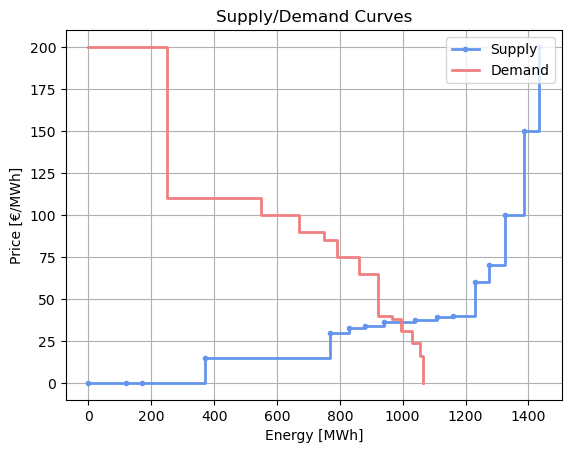

In [26]:
# Create the step plot
fig, ax = plt.subplots()
fig.figsize=(10, 6)

ax.step(x_supply, y_supply, where='post', label='Supply', color='cornflowerblue', linewidth=2, marker='.')
ax.step(x_demand, y_demand, where='post', label='Demand', color='lightcoral', linewidth=2)

# labels and title
ax.set_xlabel('Energy [MWh]')
ax.set_ylabel('Price [€/MWh]')
ax.set_title('Supply/Demand Curves')
ax.grid(True)
ax.legend(loc='upper right')

# Show the plot
plt.show()